# 导入库

In [1]:
# -*- coding: utf-8 -*-
# coding=utf-8
    
import time
import re
import os
import requests
from bs4 import BeautifulSoup
import csv
import math
import json
import urllib

from selenium import webdriver
import time

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys

from selenium.webdriver.common.action_chains import ActionChains

# from selenium.webdriver.common.action_chains import ActionChains


import socket
import csv
import pandas as pd

from selenium.webdriver.support.ui import Select
import json

In [2]:
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:55.0) Gecko/20100101 Firefox/55.0"}
   
# realurl='https://guorn.com/'
# realurl='https://guorn.com/user/home?uid=9583&page=created'
# realurl='https://guorn.com/user/strategy?uid=9583&_=1598767591913'
# realurl='https://guorn.com/user/strategy?uid=9583'
# realurl='https://guorn.com/stock/strategy?sid=402748.R.167257105885284'

# realurl='https://guorn.com/user/home?uid=332199&page=created'
# realurl='https://guorn.com/user/strategy?uid=332199'


# r = requests.get(realurl, timeout=10, headers=headers)
# # r.encoding="gb2312"
# soup=BeautifulSoup(r.text,'lxml')
# print(soup)

# lm_json = requests.get(realurl).json()
# print(lm_json)
# soup = BeautifulSoup(lm_json["content_html"])



# 登录界面/获取图片

In [1]:
# 用另一个号登入，免得封号

# 登录页面，获取图片
import requests
import json
import datetime

# 下载图片并且显示
from PIL import Image
from io import BytesIO

starttime = datetime.datetime.now()

# login_data = {"account":"13651829783","passwd":"aaronguorn"}
# login_data = {"account":"18136078552","passwd":"arong"}
# login_data = {"account":"17312656875","passwd":"arong"}
login_data = {"account":"阿荣","passwd":"arong1","keep_login":"false","code":None,"cloud_login":None}
# response = requests.post('https://guorn.com/user/login',data=json.dumps(login_data))

# print(response.text)

session = requests.Session()
response = session.post('https://guorn.com/user/login',data=json.dumps(login_data))

print(response.status_code)
print(response.text)

#long running
endtime = datetime.datetime.now()
print((endtime - starttime).seconds)

# 登录captcha，获取图片https://guorn.com/captcha/create
login_data ={"api":"/user/login"}
response = session.post('https://guorn.com/captcha/create',data=json.dumps(login_data))
print(response.status_code)
print(response.text)
j = json.loads(response.text) #解析之后的类型为字典类型
results = j.get('data').get('url')
print(results)
picurl="https://www.guorn.com"+results
print(picurl)

endtime = datetime.datetime.now()
print('累计时间1：',(endtime - starttime).seconds)

yzmdata = requests.get(picurl)
tempIm = BytesIO(yzmdata.content)
image = Image.open(tempIm)
image.show()
# response = requests.get(picurl)
# image = Image.open(BytesIO(response.content))

endtime = datetime.datetime.now()
print('累计时间2：',(endtime - starttime).seconds)
# image = Image.open(picurl)


200
{"status": "need_captcha", "data": ""}
0
200
{"status": "ok", "data": {"url": "/file/185546320753148.png"}}
/file/185546320753148.png
https://www.guorn.com/file/185546320753148.png
累计时间1： 0
累计时间2： 3


# 获取代码

In [10]:


# for uid in range(94217,100000):
# for uid in range(100001,200000):

name_list=["6005","166635","893555","13401","1233045","1095787","940220","1241409","127586","1025084","1008679","1113518","4192","114088","480183","260679","295937","407","1113229","210886","5598","3365","7522","3908","9829","101695","677","8389","8619","836","3507","18036","4232","107","119494","10394","1287","10609","4071","3251","13496","678641","5598","10127","10000","69922","963","3","4190","528"]
for uid in name_list:
    # uid='3'
    print('用户', str(uid))
    realurl='https://guorn.com/user/strategy?uid=' + str(uid)

    # rec = requests.get(url=realurl)
    rec = session.get(realurl)
    # print(rec.text)

    csvPath_StrategyList='C:/LocalTempFiles/guorn/StrategyList/'

    outputfile_StrategyList=csvPath_StrategyList + str(uid) + '.csv' 

    df_StrategyList=pd.DataFrame(columns=('name','id','annual_return','max_withdraw'))
    # df_StrategyList.columns=['name','id','annual_return','max_withdraw']

    if rec.status_code == 200:
        j = json.loads(rec.text) #解析之后的类型为字典类型
        results = j.get('data')#
        # results=results.get('app')
        # print(results)

        DailyRowPointer=0

        iWatchableDefList=0

        for i in results:
            # jobname=i.get('jobName')#获取职位名称
            # print(jobname)
            # print(i)
            # df_StrategyList.append()
            # print(i['name'],';',i['id'],';',i['annual_return'],';',i['max_withdraw'])
            
            sid=i['id']
            surl='https://guorn.com/stock/rule/definition?id=' + sid  #'332199.R.89230182441435' #&sample=1&_=1599007602280
            rec = session.get(surl)
            
            j = json.loads(rec.text)
            # print(j)
            # if j.get('data')=='\u8be5\u80a1\u7968\u6295\u8d44\u7b56\u7565\u4e0d\u5b58\u5728\u6216\u60a8\u6ca1\u6709\u6743\u9650\u67e5\u770b\u6b64\u7b56\u7565':
            if j.get('data')=='该股票投资策略不存在或您没有权限查看此策略':    
                pass
            else:
                annual_return=format(i['annual_return'], '.00%')
                max_withdraw=format(i['max_withdraw'], '.00%')
                print('可查看定义:',i['name'],i['id'],annual_return,max_withdraw)

                df_StrategyList.loc[DailyRowPointer,'id']=i['id']
                df_StrategyList.loc[DailyRowPointer,'name']=i['name']
                df_StrategyList.loc[DailyRowPointer,'annual_return']=annual_return
                df_StrategyList.loc[DailyRowPointer,'max_withdraw']=max_withdraw
                # df_StrategyList=df_StrategyList.append()
                # print(df_StrategyList)
                # print()
                
                # 此处导出定义文件

                iWatchableDefList=iWatchableDefList+1

            DailyRowPointer=DailyRowPointer+1

            time.sleep(0.3)

        print('共有策略', len(results),'条')
        print('可查看定义共',iWatchableDefList,'条')

        if iWatchableDefList>1:
            print('有定义的用户：', 'https://guorn.com/user/strategy?uid=' , str(uid))
        

    if df_StrategyList.empty!=True and iWatchableDefList>1:
        df_StrategyList.to_csv(outputfile_StrategyList)
    
    time.sleep(0.3)



用户 6005
共有策略 55 条
可查看定义共 0 条
用户 166635
共有策略 102 条
可查看定义共 0 条
用户 893555
共有策略 2 条
可查看定义共 0 条
用户 13401
共有策略 22 条
可查看定义共 0 条
用户 1233045
共有策略 2 条
可查看定义共 0 条
用户 1095787
共有策略 2 条
可查看定义共 0 条
用户 940220
共有策略 1 条
可查看定义共 0 条
用户 1241409
共有策略 4 条
可查看定义共 0 条
用户 127586
共有策略 22 条
可查看定义共 0 条
用户 1025084
共有策略 8 条
可查看定义共 0 条
用户 1008679
共有策略 6 条
可查看定义共 0 条
用户 1113518
共有策略 16 条
可查看定义共 0 条
用户 4192
共有策略 5 条
可查看定义共 0 条
用户 114088
共有策略 5 条
可查看定义共 0 条
用户 480183
共有策略 6 条
可查看定义共 0 条
用户 260679
共有策略 139 条
可查看定义共 0 条
用户 295937
共有策略 29 条
可查看定义共 0 条
用户 407
共有策略 42 条
可查看定义共 0 条
用户 1113229
共有策略 1 条
可查看定义共 0 条
用户 210886
共有策略 6 条
可查看定义共 0 条
用户 5598
共有策略 13 条
可查看定义共 0 条
用户 3365
共有策略 22 条
可查看定义共 0 条
用户 7522
共有策略 10 条
可查看定义共 0 条
用户 3908
共有策略 101 条
可查看定义共 0 条
用户 9829
共有策略 45 条
可查看定义共 0 条
用户 101695
共有策略 1 条
可查看定义共 0 条
用户 677
共有策略 62 条
可查看定义共 0 条
用户 8389
共有策略 5 条
可查看定义共 0 条
用户 8619
共有策略 74 条
可查看定义共 0 条
用户 836
共有策略 47 条
可查看定义共 0 条
用户 3507
共有策略 5 条
可查看定义共 0 条
用户 18036
共有策略 21 条
可查看定义共 0 条
用户 4232
共有策略 3 条
可查看定义共 0 条
用户 107
可查看定义: 策略

In [37]:


# j = json.loads(rec.text) #解析之后的类型为字典类型

# result_tabs = j.get('data').get('tabs')#
# print(result_tabs)
# # for i in results:
# #     print(i['position_limit'],';',i['id'],';',i['annual_return'],';',i['max_withdraw'])

# result_ranks = j.get('data').get('ranks')#
# print(result_ranks)

{"status": "info", "data": "\u8be5\u80a1\u7968\u6295\u8d44\u7b56\u7565\u4e0d\u5b58\u5728\u6216\u60a8\u6ca1\u6709\u6743\u9650\u67e5\u770b\u6b64\u7b56\u7565"}


In [4]:
# 列出某个策略所有的定义

# definitionurl='https://guorn.com/stock/rule/definition?id=332199.R.89230182441435&sample=1'

# definition=requests.get(url=definitionurl)
# print(definition.text)

# response_json = requests.get(definitionurl).json()

# response_json = response_json.decode('utf-8')


# if definition.status_code == 200:
#     j = json.loads(definition.text) 
    # results = j.get('data')#
    # print(results)

    # for i in results:
        # jobname=i.get('jobName')#获取职位名称
        # print(jobname)
        # print(i)
        # print(i['name'],';',i['id'],';',i['annual_return'],';',i['max_withdraw'])

<!DOCTYPE html>
<html lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>
<meta name="keywords" content="股票投资策略商城,量化投资股票策略">
<meta name="description" content="为您提供投资专家精心开发的量化投资策略，让你的投资变的更轻松、收益更稳当。">
<meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1, user-scalable=0"/>
<meta name="format-detection" content="telephone=no">
<link id="favicon" rel="shortcut icon" href=""/>
<link type="text/css" rel="stylesheet" href="/static/libs/bootstrap/bootstrap_d4e377c.css">
<link type="text/css" rel="stylesheet" href="/static/src/css/commons_2f48594.css">
<!--<link type="text/css" rel="stylesheet" href="/static/src/css/mobile/base_m.css"/>-->
<!--<link type="text/css" rel="stylesheet" href="/static/src/css/app/appBase.css"/>-->
<link type="text/css" rel="stylesheet" href="/static/src/css/mobile/login_m_207ea60.css">
<title>登录</title>
</head>
<body>
<nav class="navbar navbar-static-top" id="title-cnt">
</nav>
<div id="headerApp">
<div 

In [8]:
# sidurl='https://guorn.com/stock/strategy?sid=332199.R.89230182441435'

# 上述网址只能返回200，需要用到以下url 返回策略的收益情况
sideurl='https://guorn.com/stock/strategy?fmt=json&sid=332199.R.89230182441435&_=1598872882855'

# 要想看到
rec = requests.get(url=sideurl)
# print(rec)
# r = requests.get(sidurl, timeout=100, headers=headers)
# # r.encoding="gb2312"
# soup=BeautifulSoup(r.text,'lxml')

# print(soup)

if rec.status_code == 200:
    j = json.loads(rec.text) #解析之后的类型为字典类型
    # results = j.get('data')#
    print(j)

# print(rec)
# if rec.status_code == 200:

{'status': 'ok', 'data': {'redirect': '/stock/strategy/calc'}}


In [9]:
# ‘查看定义’，是这个网址
# siddefurl='https://guorn.com/stock?sid=332199.R.89230182441435&exec=1&category=stock'
siddefurl='https://guorn.com/stock?sid=332199.R.89230182441435#'

r = requests.get(siddefurl, timeout=100, headers=headers)

soup=BeautifulSoup(r.text,'lxml')

print(soup)


<!DOCTYPE html>
<html>
<head lang="zh-CN">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="股票|基金量化投资策略" name="keywords"/>
<meta content="果仁网让你轻松自足创建股票|基金量化投资策略。" name="description"/>
<link href="/static/libs/jquery-ui/jquery-ui_075d6d4.css" rel="stylesheet" type="text/css"/>
<!-- Bootstrap core CSS -->
<link href="/static/libs/bootstrap/bootstrap_d4e377c.css" rel="stylesheet" type="text/css"/>
<link href="/static/src/css/commons_2f48594.css" rel="stylesheet" type="text/css"/>
<link href="/static/src/css/loginCtl_f3432da.css" rel="stylesheet" type="text/css"/>
<link href="/static/src/css/stockScreen_85548b4.css" rel="stylesheet" type="text/css"/>
<link href="/static/libs/bootstrap/bootstrap-slider_738ceac.css" rel="stylesheet" type="text/css"/>
<link href="/static/libs/bootstrap/bootstrap-submenu_7123969.css" rel="stylesheet" type="text/css"/>
<link href="/static/libs/boot

In [10]:
# 模拟登录页面
# payload = {"account":"13651829783","passwd":"aaronguorn","keep_login":"true","code":0,"cloud_login":0}
# data = {"account":"13651829783","passwd":"aaronguorn","keep_login":"true","code":None,"cloud_login":0}
data = {"account":"13651829783","passwd":"aaronguorn"}

# header = {'Accept':'application/json, text/javascript, */*; q=0.01',   
#    'Accept-Encoding': 'gzip, deflate, br',
#    'Accept-Language': 'zh-CN',
#    'Cache-Control': 'no-cache',
#    'Connection': 'Keep-Alive',
#    'Content-Length': '95',
#    'Cookie':'_xsrf=2|0f6c84d1|560498120eea3fddc8da464f0588cf50|1598831664; Hm_lpvt_40ee94ccee2cf1051316f73e3fbcf8ac=1598938188; tempStrategyOwner=13651829783; _gid=GA1.2.1196045778.1598766960; sv="2|1:0|10:1598872818|2:sv|4:MTE=|cc8d508cca905f14514f31515b529bb7d1d2bd7159d94e49a4b18dffb307a88b"; Hm_lvt_40ee94ccee2cf1051316f73e3fbcf8ac=1598766960,1598769156,1598782694,1598831663; _ga=GA1.2.1926308829.1598675953; captcha="2|1:0|10:1598938188|7:captcha|60:MzE3NjFmYjBmODMyYjc4MzIyMmNjMWY4NzhjZmRlNGQ6L3VzZXIvbG9naW4=|0c12d95e1c16754f7f0fdaa5bb0a6a61955650216d8956888ee960ff50a3147b"; _gat=1',
#    'Content-Type': 'application/json; charset=utf-8',
#    'Host': 'guorn.com',
#    'Origin': 'https://guorn.com',
#    'Referer': 'https://guorn.com/user/login',
#    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.18363',
#    'X-Requested-With': 'XMLHttpRequest'}



# response = requests.post('https://guorn.com/user/login',data=data, json=True,headers=header)
response = requests.post('https://guorn.com/user/login',data=json.dumps(data))
# response = response.content.decode()

print(response.text)

# soup=BeautifulSoup(response.text,'lxml')

# print(soup)


#需要携带请求头信息的可以全部写在headers里面，data就是请求体，需要携带其他信息的也可以另外再加
# print(response)
#一般情况下就可以请求成功得到返回值


{"status": "ok", "data": {"username": " \u6995\u6849\u7238", "account": "13651829783", "uid": 402748}}


In [18]:
# 运用session/cookie




200
<!DOCTYPE html>
<html>
<head lang="zh-CN">
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=device-width, initial-scale=1">
<meta name="keywords" content="果仁,果仁网,股票,证券,回测,选股">
<meta name="description" content="果仁网是提供给理性投资者的分析平台。">
<link type="text/css" rel="stylesheet" href="/static/libs/jquery-ui/jquery-ui_075d6d4.css">
<!-- Bootstrap core CSS -->
<link type="text/css" rel="stylesheet" href="/static/libs/bootstrap/bootstrap_d4e377c.css">
<link type="text/css" rel="stylesheet" href="/static/libs/bootstrap/bootstrap-submenu_7123969.css">
<link type="text/css" rel="stylesheet" href="/static/libs/summernote/summernote_bf19ca1.css">
<link type="text/css" rel="stylesheet" href="/static/libs/summernote/summernote-emoji_a62a749.css">
<link type="text/css" rel="stylesheet" href="/static/libs/summernote/font-awesome_7ae39bf.css">
<link type="text/css" rel="stylesheet" href="/static/src/css/commons_2f48594.css">
<link type="tex

In [22]:
# 解析定义文件

# url='https://guorn.com/user/home'
# url='https://guorn.com/stock?sid=332199.R.89230182441435'
url='https://guorn.com/stock/rule/definition?id=332199.R.89230182441435' #&sample=1&_=1599007602280
rec = session.get(url)
print(rec.text)

j = json.loads(rec.text) #解析之后的类型为字典类型

result_tabs = j.get('data').get('tabs')#
print(result_tabs)
# for i in results:
#     print(i['position_limit'],';',i['id'],';',i['annual_return'],';',i['max_withdraw'])

result_ranks = j.get('data').get('ranks')#
print(result_ranks)
# for i in results:
#     print(i['position_limit'],';',i['id'],';',i['annual_return'],';',i['max_withdraw'])

# print(len(results))



{"status": "ok", "data": {"position_limit": 1, "reference": "000300", "tabs": {"back_test": {"count": "28", "backup_num": "5", "position_limit": 1, "end": "2020/08/28", "min_position": 0.01, "reference": "000300", "trading_strategy": {"buy_options": [], "hold_options": [], "sell_options": [{"id": "0.SM.\u6392\u540d\u540d\u6b21.0", "val": "20", "op": "ge"}]}, "price": "close", "period": 20, "position_bias": 0.3, "max_count": 15, "start": "2007/01/04", "model": 0, "trade_cost": 0.002, "ideal_count": 10, "hedge": false, "always_tradable": 0, "ideal_position": 0.1, "backup_fund": ""}, "screen": {"date": "2020/08/28"}, "rank": {"start": "2007/01/04", "bucket_count": "10", "end": "2020/08/28", "period": 20}}, "period": 20, "position_bias": 0.3, "max_count": 15, "filters": [{"industry": 0, "type": "meas", "id": "0.M.\u80a1\u7968\u6bcf\u65e5\u6307\u6807_\u6210\u4ea4\u91d1\u989d.0", "val": 10000000, "op": "gt"}, {"industry": 0, "type": "meas", "id": "0.M.\u80a1\u7968\u6bcf\u65e5\u6307\u6807_\u5

In [12]:

# siddefurl='https://guorn.com/stock?sid=332199.R.89230182441435'

# r = requests.get(siddefurl,headers=header)
# print(r)

# soup=BeautifulSoup(r.text,'lxml')

# print(soup)



ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [3]:
# 范例 https://blog.csdn.net/u283056051/article/details/49946981

import urllib.request
import urllib
import gzip
import http.cookiejar
 
 
def getOpener(head):
    # deal with the Cookies
    cj = http.cookiejar.CookieJar()
    pro = urllib.request.HTTPCookieProcessor(cj)
    opener = urllib.request.build_opener(pro)
    header = []
    for key, value in head.items():
        elem = (key, value)
        header.append(elem)
    opener.addheaders = header
    return opener
 
def ungzip(data):
    try:        # 尝试解压
        print('正在解压.....')
        data = gzip.decompress(data)
        print('解压完毕!')
    except:
        print('未经压缩, 无需解压')
    return data
 
 
# header = {
#     'Connection': 'Keep-Alive',
#     'Accept-Language': 'zh-CN,zh;q=0.8',
#     'Accept': 'application/json, text/javascript, */*; q=0.01',
#     'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.101 Safari/537.36',
#     'Accept-Encoding': 'gzip, deflate',
#     'X-Requested-With': 'XMLHttpRequest',
#     'Host': 'www.17sucai.com',
# }

header = {'Accept':'application/json, text/javascript, */*; q=0.01',   
   'Accept-Encoding': 'gzip, deflate, br',
   'Accept-Language': 'zh-CN',
   'Cache-Control': 'no-cache',
   'Connection': 'Keep-Alive',
   'Content-Length': '95',
   'Cookie':'_xsrf=2|0f6c84d1|560498120eea3fddc8da464f0588cf50|1598831664; Hm_lpvt_40ee94ccee2cf1051316f73e3fbcf8ac=1598938188; tempStrategyOwner=13651829783; _gid=GA1.2.1196045778.1598766960; sv="2|1:0|10:1598872818|2:sv|4:MTE=|cc8d508cca905f14514f31515b529bb7d1d2bd7159d94e49a4b18dffb307a88b"; Hm_lvt_40ee94ccee2cf1051316f73e3fbcf8ac=1598766960,1598769156,1598782694,1598831663; _ga=GA1.2.1926308829.1598675953; captcha="2|1:0|10:1598938188|7:captcha|60:MzE3NjFmYjBmODMyYjc4MzIyMmNjMWY4NzhjZmRlNGQ6L3VzZXIvbG9naW4=|0c12d95e1c16754f7f0fdaa5bb0a6a61955650216d8956888ee960ff50a3147b"; _gat=1',
   'Content-Type': 'application/json; charset=utf-8',
   'Host': 'guorn.com',
   'Origin': 'https://guorn.com',
   'Referer': 'https://guorn.com/user/login',
   'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.18363',
   'X-Requested-With': 'XMLHttpRequest'}

 
# url = 'https://guorn.com/user/login?account=13651829783&passwd=aaronguorn'
url = 'https://guorn.com/user/home'
opener = getOpener(header)
 

password = 'aaronguorn'
postDict = {
        'account':'13651829783','passwd':'aaronguorn','keep_login':"false","code":None,"cloud_login":0
}

postData = urllib.parse.urlencode(postDict).encode()
op = opener.open(url, postData)
data = op.read()
data = ungzip(data)
 
print(data)

# url = 'https://guorn.com/user/login' #签到的地址
 
# op = opener.open(url)
 
# data = op.read()
# data = ungzip(data)
 
# print(data)

正在解压.....
解压完毕!
b'{"status": "failed", "data": "Server Error"}'


In [32]:
# 图片密码识别

import tesserocr

from PIL import Image

image = Image.open('c:/1.png')
image=image.convert('L') #灰度图像
# image=image.convert('1') #二值化处理
# image.show()
# threshold=80
# table=[]
# for i in range(256):
#     if i <threshold:
#         table.append(0)
#     else:
#         table.append(1)
# image=image.point(table,'1')
threshold = 150   
table = []
for i in  range(256):
    if i < threshold:
        table.append(0)
    else:
        table.append(1)
#通过表格转换成二进制图片，1的作用是白色，不然就全部黑色了
image = image.point(table,"1")

image.show()
# image.show()
result = tesserocr.image_to_text(image)
print(result)

# print(tesserocr.file_to_text('c:/1.png'))



0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ


Text(0.5, 1.0, 'SJM6')

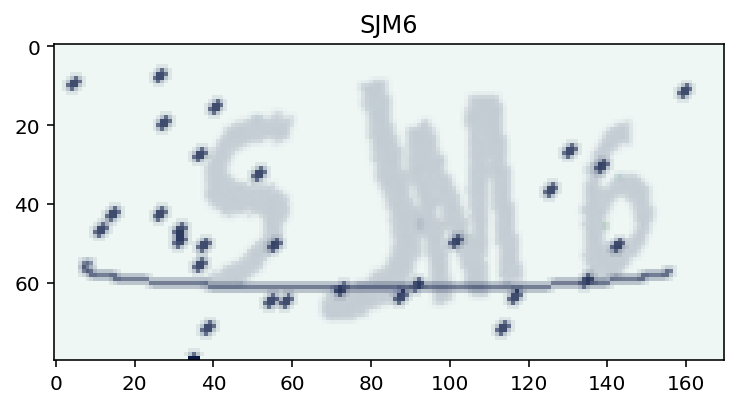

In [2]:
# Captcha生成

from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import string
characters = string.digits + string.ascii_uppercase
print(characters)

width, height, n_len, n_class = 170, 80, 4, len(characters)

generator = ImageCaptcha(width=width, height=height)
random_str = ''.join([random.choice(characters) for j in range(4)])
img = generator.generate_image(random_str)

plt.imshow(img)
plt.title(random_str)

In [14]:
import tensorflow as tf
import tensorflow.keras.backend as K

config = tf.ConfigProto()

# config=tf.compat.v1.ConfigProto()

config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-e70f9a6fb5d2>", line 6, in <module>
    config=tf.compat.v1.ConfigProto()
AttributeError: module 'tensorflow' has no attribute 'compat'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Aaron\AppData\Local\

AttributeError: module 'tensorflow' has no attribute 'compat'

In [18]:
# https://blog.csdn.net/chyang1999/article/details/78615236

# 定义数据生成器,默认一批生成32张图片
import matplotlib.pyplot as plt

def gen(batch_size = 32):

    X = np.zeros((batch_size,3,height,width),dtype=np.uint8)

    y = [np.zeros((batch_size,n_class),dtype=np.uint8) for i in range(n_len)]

    generator = ImageCaptcha(height=height,width=width)

    while True:

        for i in range(batch_size):

            random_str = ''.join([random.choice(characters) for j in range(4)])

            X[i] = np.array(generator.generate_image(random_str)).transpose((2,0,1))

            for j, ch in enumerate(random_str):

                y[j][i,:] = 0

                y[j][i,characters.find(ch)] = 1

        yield X,y


# 将概率最大的四个字符的编号转换为字符串

def decode(y):

    y = np.argmax(np.array(y),axis=2)[:,0]

    return ''.join([characters[x] for x in y])


# 构建模型

def captcha_model():

    width, height, n_len, n_class = 170,80,4,36

    input_tensor = Input(shape=(3,height,width))

    x = input_tensor

    for i in range(4):

        x = Convolution2D(32*2**i,3,3,activation='relu')(x)

        x = Convolution2D(32*2**i,3,3,activation='relu')(x)

        x = BatchNormalization(axis=1)(x)

        x = MaxPooling2D((2,2))(x)

    x = Flatten()(x)

    x = [Dense(n_class,activation='softmax',name='c%d' % (i+1))(x) for i in range(4)]

    model = Model(input=input_tensor,output=x)

    return model

plot(model,to_file='model.png',show_shapes=True)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-12763fc88906>", line 4, in <module>
    import matplotlib.plot
ModuleNotFoundError: No module named 'matplotlib.plot'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ModuleNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Aaron\AppData\Local\Programs\Pyth

ModuleNotFoundError: No module named 'matplotlib.plot'

In [21]:
from captcha_solver import CaptchaSolver

solver = CaptchaSolver('browser')
raw_data = open('c:\\1.png', 'rb').read()
print(solver.solve_captcha(raw_data))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-64f472644e13>", line 5, in <module>
    print(solver.solve_captcha(raw_data))
  File "C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\captcha_solver\solver.py", line 112, in solve_captcha
    ' Error: %s' % fail)
captcha_solver.error.SolutionTimeoutError: Service is not available. Error: <urlopen error [WinError 3] The system cannot find the path specified: ''>

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    s

SolutionTimeoutError: Service is not available. Error: <urlopen error [WinError 3] The system cannot find the path specified: ''>

# 密码组合


In [12]:
import itertools
result = itertools.product("0123456789",repeat=6)
print(result)
l = list(result)[1000:1010]
print(l)  #小心MemoryError：内存溢出
print(len(l))
print(l[9])

[('0', '0', '1', '0', '0', '0'), ('0', '0', '1', '0', '0', '1'), ('0', '0', '1', '0', '0', '2'), ('0', '0', '1', '0', '0', '3'), ('0', '0', '1', '0', '0', '4'), ('0', '0', '1', '0', '0', '5'), ('0', '0', '1', '0', '0', '6'), ('0', '0', '1', '0', '0', '7'), ('0', '0', '1', '0', '0', '8'), ('0', '0', '1', '0', '0', '9')]
10
('0', '0', '1', '0', '0', '9')


# 异步编程
https://www.cnblogs.com/shenh/p/9090586.html


In [1]:
import time

def hello():
    time.sleep(1)

def run():
    for i in range(5):
        hello()
        print('Hello World:%s' % time.time())  # 任何伟大的代码都是从Hello World 开始的！
if __name__ == '__main__':
    run()

Hello World:1600348419.9421299
Hello World:1600348420.94257
Hello World:1600348421.942988
Hello World:1600348422.9434104
Hello World:1600348423.943819


# 异步代码


In [9]:
import time
import asyncio
import nest_asyncio
nest_asyncio.apply()
# 定义异步函数
async def hello():
    asyncio.sleep(1)
    print('Hello World:%s' % time.time())

def run():
    for i in range(5):
        loop.run_until_complete(hello())

loop = asyncio.get_event_loop()
if __name__ =='__main__':
    run()

Hello World:1600348759.4782832
Hello World:1600348759.4782832
Hello World:1600348759.4782832
Hello World:1600348759.4782832
Hello World:1600348759.4782832


# aiohttp 异步登陆网页

In [8]:
import asyncio
from aiohttp import ClientSession
import nest_asyncio
nest_asyncio.apply()

tasks = []
# url = "https://www.baidu.com/{}"
url = "https://www.guorn.com/"
async def hello(url):
    async with ClientSession() as session:
        async with session.get(url) as response:
            response = await response.read()
            print(response)

if __name__ == '__main__':
    loop = asyncio.get_event_loop()
    loop.run_until_complete(hello(url))

\n<div class="content">\n<!--<div class="item"><p class="top"><a href="/forum/post?pid=p.3.52223555813477&tag=elite" target="_blank">\xe4\xbb\x80\xe4\xb9\x88\xe6\x98\xaf\xe9\x87\x8f\xe5\x8c\x96\xe6\x8a\x95\xe8\xb5\x84\xef\xbc\x9f\xe4\xbb\x80\xe4\xb9\x88\xe6\x98\xaf\xe9\x87\x8f\xe5\x8c\x96\xe6\x8a\x95\xe8\xb5\x84\xef\xbc\x9f\xe4\xbb\x80\xe4\xb9\x88\xe6\x98\xaf\xe9\x87\x8f\xe5\x8c\x96\xe6\x8a\x95\xe8\xb5\x84\xef\xbc\x9f\xe4\xbb\x80\xe4\xb9\x88\xe6\x98\xaf\xe9\x87\x8f\xe5\x8c\x96\xe6\x8a\x95\xe8\xb5\x84\xef\xbc\x9f\xe4\xbb\x80\xe4\xb9\x88\xe6\x98\xaf\xe9\x87\x8f\xe5\x8c\x96\xe6\x8a\x95\xe8\xb5\x84\xef\xbc\x9f\xe4\xbb\x80\xe4\xb9\x88\xe6\x98\xaf\xe9\x87\x8f\xe5\x8c\x96\xe6\x8a\x95\xe8\xb5\x84\xef\xbc\x9f\xe4\xbb\x80\xe4\xb9\x88\xe6\x98\xaf\xe9\x87\x8f\xe5\x8c\x96\xe6\x8a\x95\xe8\xb5\x84\xef\xbc\x9f\xe4\xbb\x80\xe4\xb9\x88\xe6\x98\xaf\xe9\x87\x8f\xe5\x8c\x96\xe6\x8a\x95\xe8\xb5\x84\xef\xbc\x9f\xe4\xbb\x80\xe4\xb9\x88\xe6\x98\xaf\xe9\x87\x8f\xe5\x8c\x96\xe6\x8a\x95\xe8\xb5\x84\xef\xbc\x9f</a

# 多链接异步访问

In [10]:
import time
import asyncio
from aiohttp import ClientSession

tasks = []
url = "https://www.baidu.com/{}"
async def hello(url):
    async with ClientSession() as session:
        async with session.get(url) as response:
            response = await response.read()
#            print(response)
            print('Hello World:%s' % time.time())

def run():
    for i in range(5):
        task = asyncio.ensure_future(hello(url.format(i)))
        tasks.append(task)


if __name__ == '__main__':
    loop = asyncio.get_event_loop()
    run()
    loop.run_until_complete(asyncio.wait(tasks))

Hello World:1600348844.9880118
Hello World:1600348844.9930084
Hello World:1600348844.9950068
Hello World:1600348845.0010037
Hello World:1600348845.0020027


# 收集http响应

In [11]:
import time
import asyncio
from aiohttp import ClientSession

tasks = []
url = "https://www.baidu.com/{}"
async def hello(url):
    async with ClientSession() as session:
        async with session.get(url) as response:
#            print(response)
            print('Hello World:%s' % time.time())
            return await response.read()

def run():
    for i in range(5):
        task = asyncio.ensure_future(hello(url.format(i)))
        tasks.append(task)
    result = loop.run_until_complete(asyncio.gather(*tasks))
    print(result)

if __name__ == '__main__':
    loop = asyncio.get_event_loop()
    run()

Hello World:1600348912.6743884
Hello World:1600348912.6773865
Hello World:1600348912.6783779
Hello World:1600348912.6783779
Hello World:1600348912.6793861
[b'<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>404 Not Found</title>\n</head><body>\n<h1>Not Found</h1>\n<p>The requested URL /0 was not found on this server.</p>\n</body></html>\n', b'<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>404 Not Found</title>\n</head><body>\n<h1>Not Found</h1>\n<p>The requested URL /1 was not found on this server.</p>\n</body></html>\n', b'<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>404 Not Found</title>\n</head><body>\n<h1>Not Found</h1>\n<p>The requested URL /2 was not found on this server.</p>\n</body></html>\n', b'<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>404 Not Found</title>\n</head><body>\n<h1>Not Found</h1>\n<p>The requested URL /3 was not found on this server.</p>\n</body></html>\n', 

# 异常解决
1.限制并发数量。（一次不要塞那么多任务，或者限制最大并发数量）
2.使用回调的方式。
3.修改操作系统打开文件数的最大限制，在系统里有个配置文件可以修改默认值，具体步骤不再说明了。
不修改系统默认配置的话，个人推荐限制并发数的方法，设置并发数为500，处理速度更快。

In [13]:
#coding:utf-8
import time,asyncio,aiohttp


url = 'https://www.baidu.com/'
async def hello(url,semaphore):
    async with semaphore:
        async with aiohttp.ClientSession() as session:
            async with session.get(url) as response:
                return await response.read()


async def run():
    semaphore = asyncio.Semaphore(500) # 限制并发量为500
    to_get = [hello(url.format(),semaphore) for _ in range(1000)] #总共1000任务
    await asyncio.wait(to_get)


if __name__ == '__main__':
#    now=lambda :time.time()
    loop = asyncio.get_event_loop()
    loop.run_until_complete(run())
    loop.close()

ValueError: too many file descriptors in select()